In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from notebookutils import root_dir, corr_plot; root_dir()

now in dir:  /Users/Jeppe/Projects/BayesFactorModel


In [3]:
from model.utils import read_party_keys, party_name_from_key
from model.distributionplotter import DistributionPlotter
from model.traceplotter import TracePlotter
from model.parameterframe import ParameterFrame
from model.parameters import Parameters
from model.plotter import Plotter

In [4]:
beta_trace = pd.read_pickle('data//probit_estimation_beta_trace_df.pkl')
factor_trace = pd.read_pickle('data//probit_estimation_factor_trace_df.pkl')
ystar_trace = pd.read_pickle('data//probit_ystar_trace_df.pkl')
tau_trace = pd.read_pickle('data//probit_tau_trace_df.pkl')

In [5]:
labels = read_party_keys()

In [6]:
order = ['q2', 'q8', 'q0', 'q1', 'q3', 'q4','q5','q6','q7','q9', 'q10', 'q11', 'q12', 'q13', 'q14']

In [7]:
# setting right style for plots
plt.rcdefaults()

### Tau

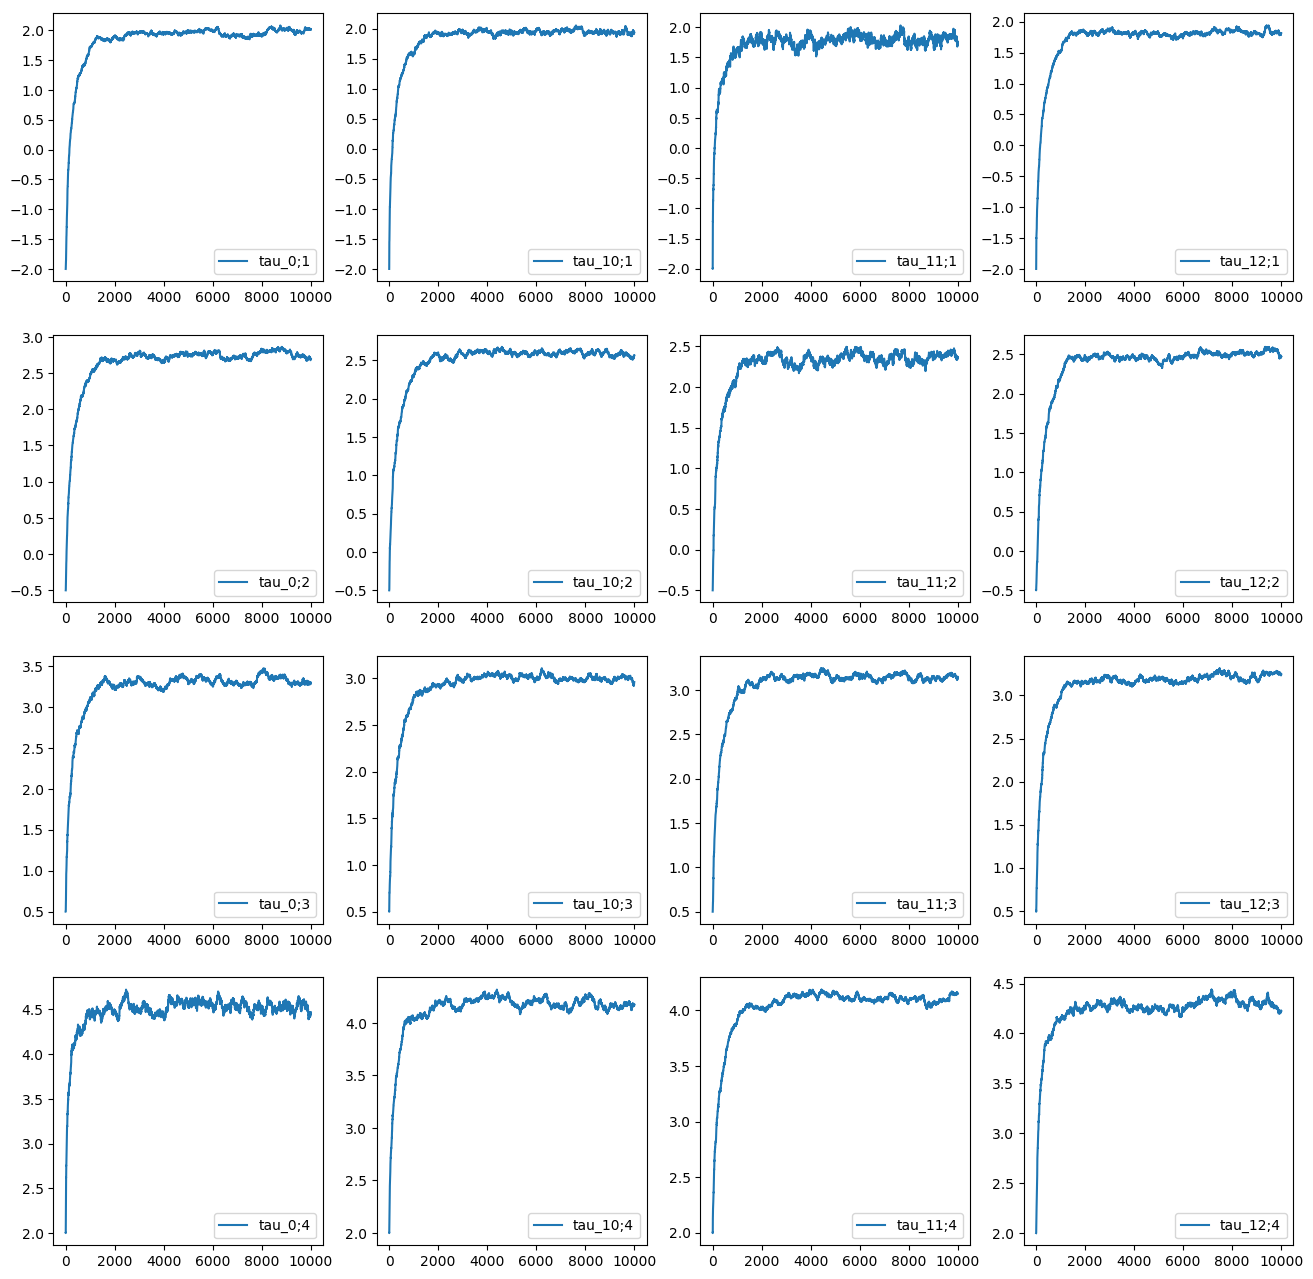

In [8]:
tp = TracePlotter(tau_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_tau_trace_plot.png')
f

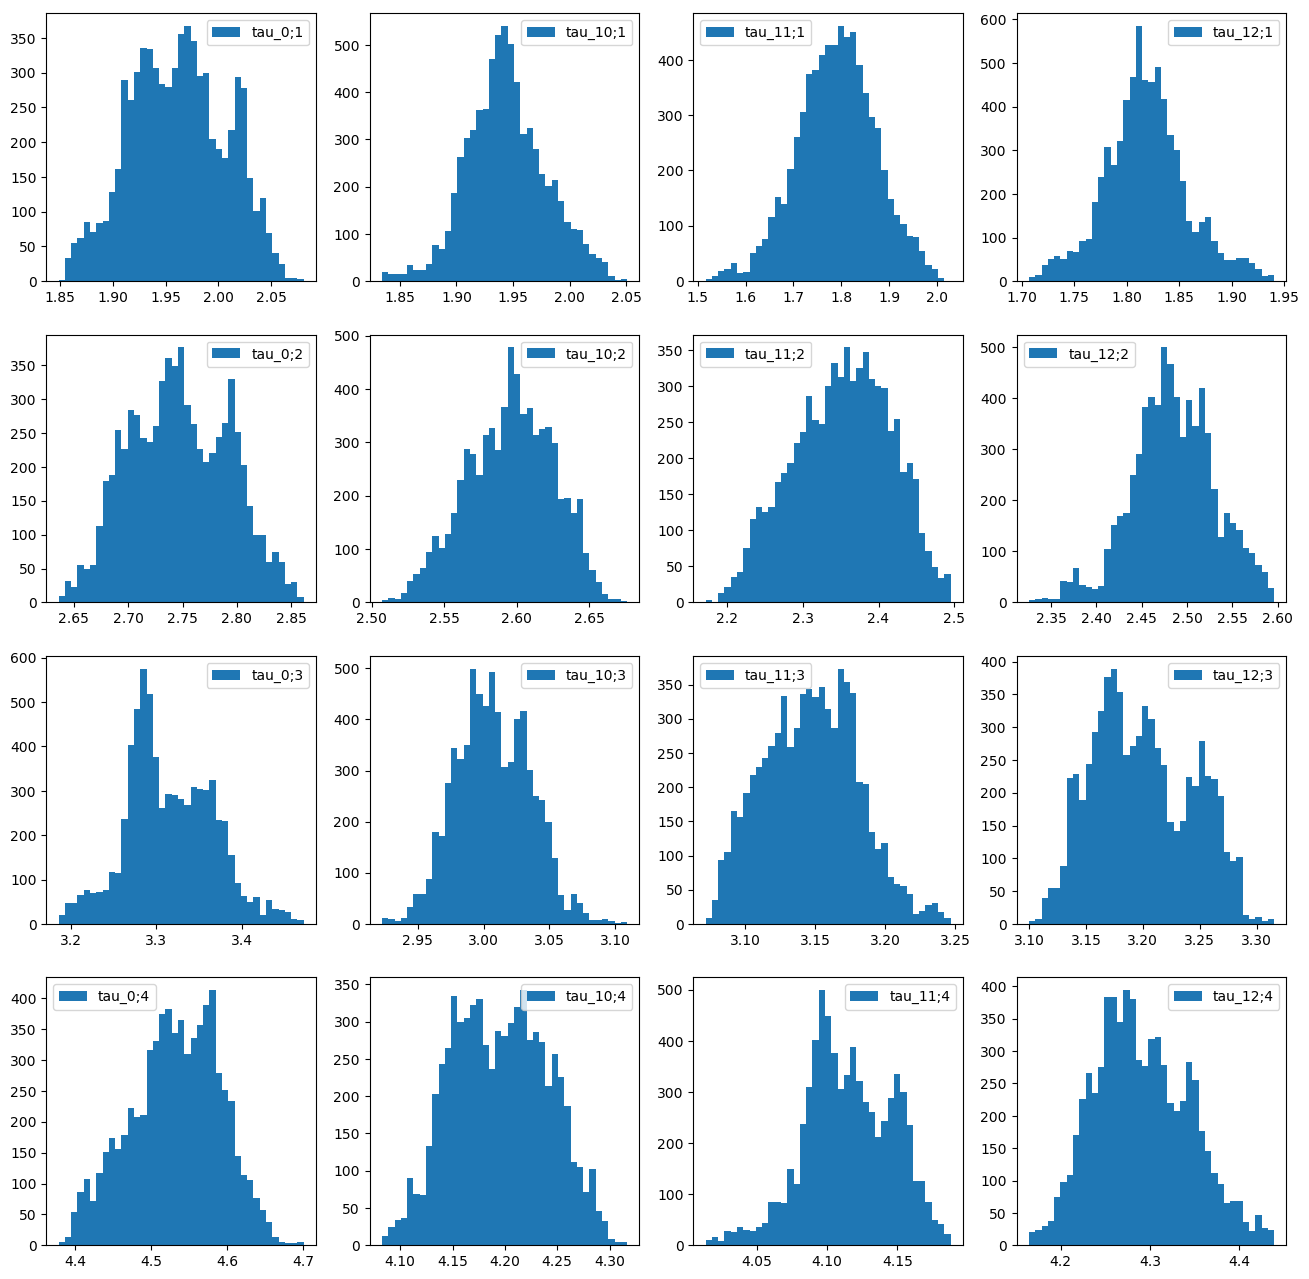

In [9]:
dp = DistributionPlotter(tau_trace, 0)
f = dp.plot_4x4_hists(skip_obs=3000)
f.savefig('figs_probit//probit_tau_dist_plot.png')
f

### Beta

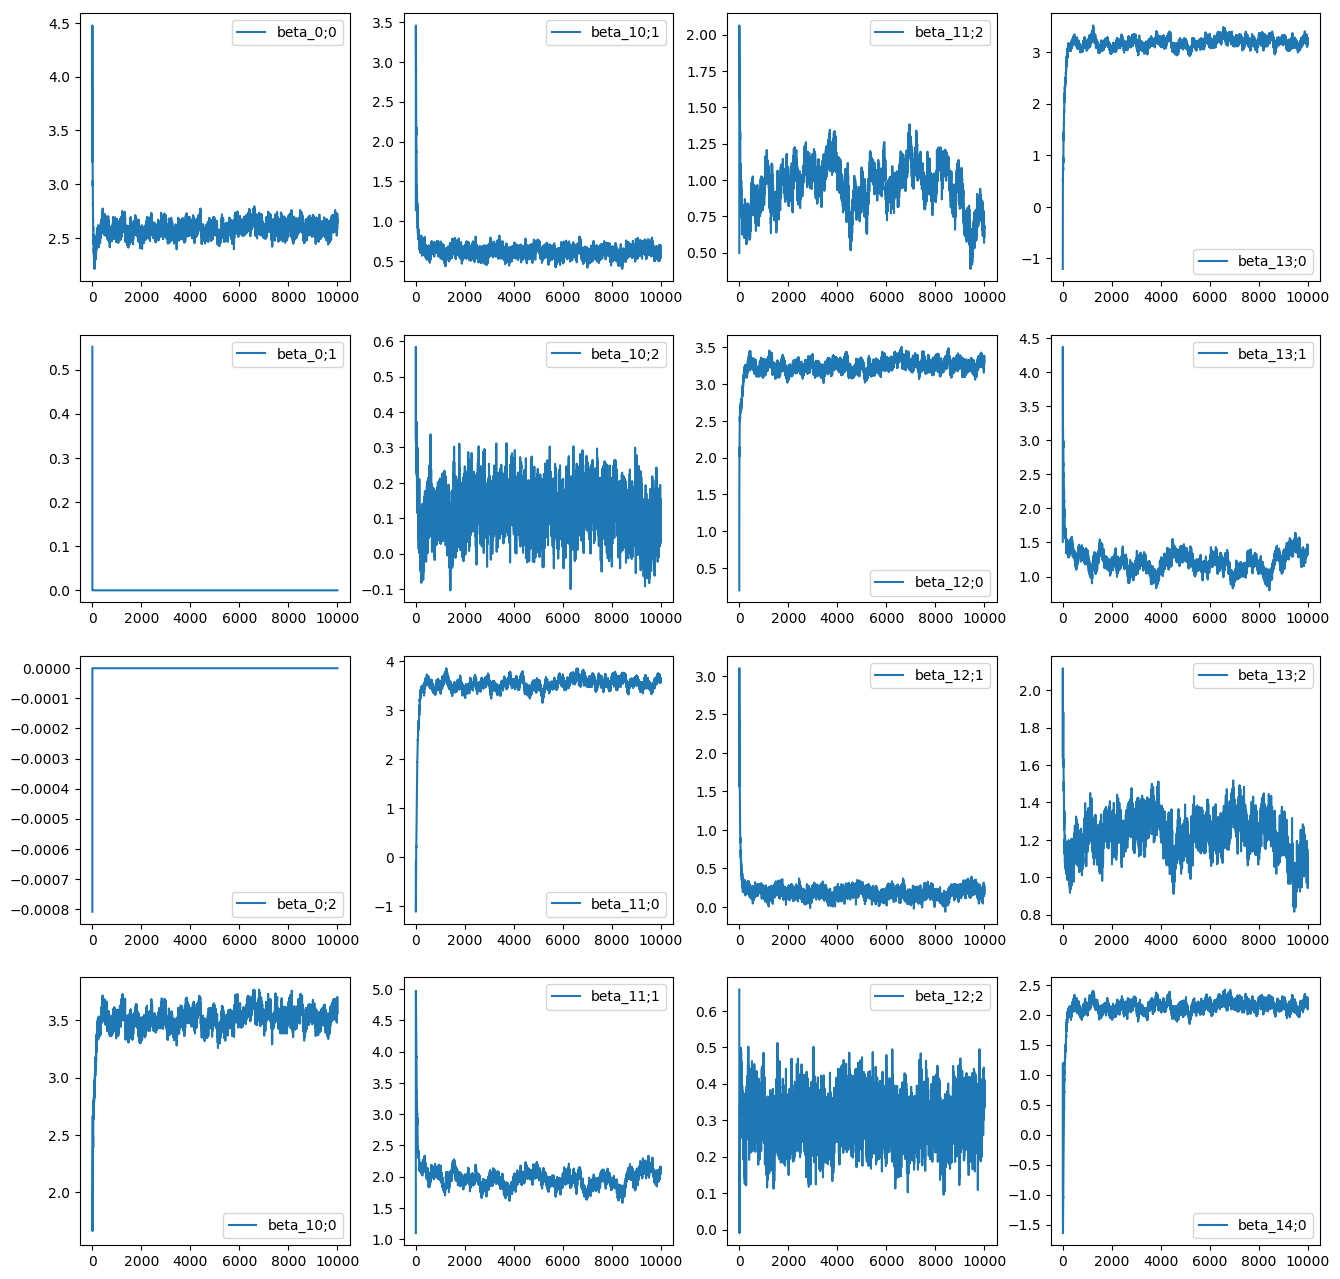

In [10]:
tp = TracePlotter(beta_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_beta_trace_plot.png')
f

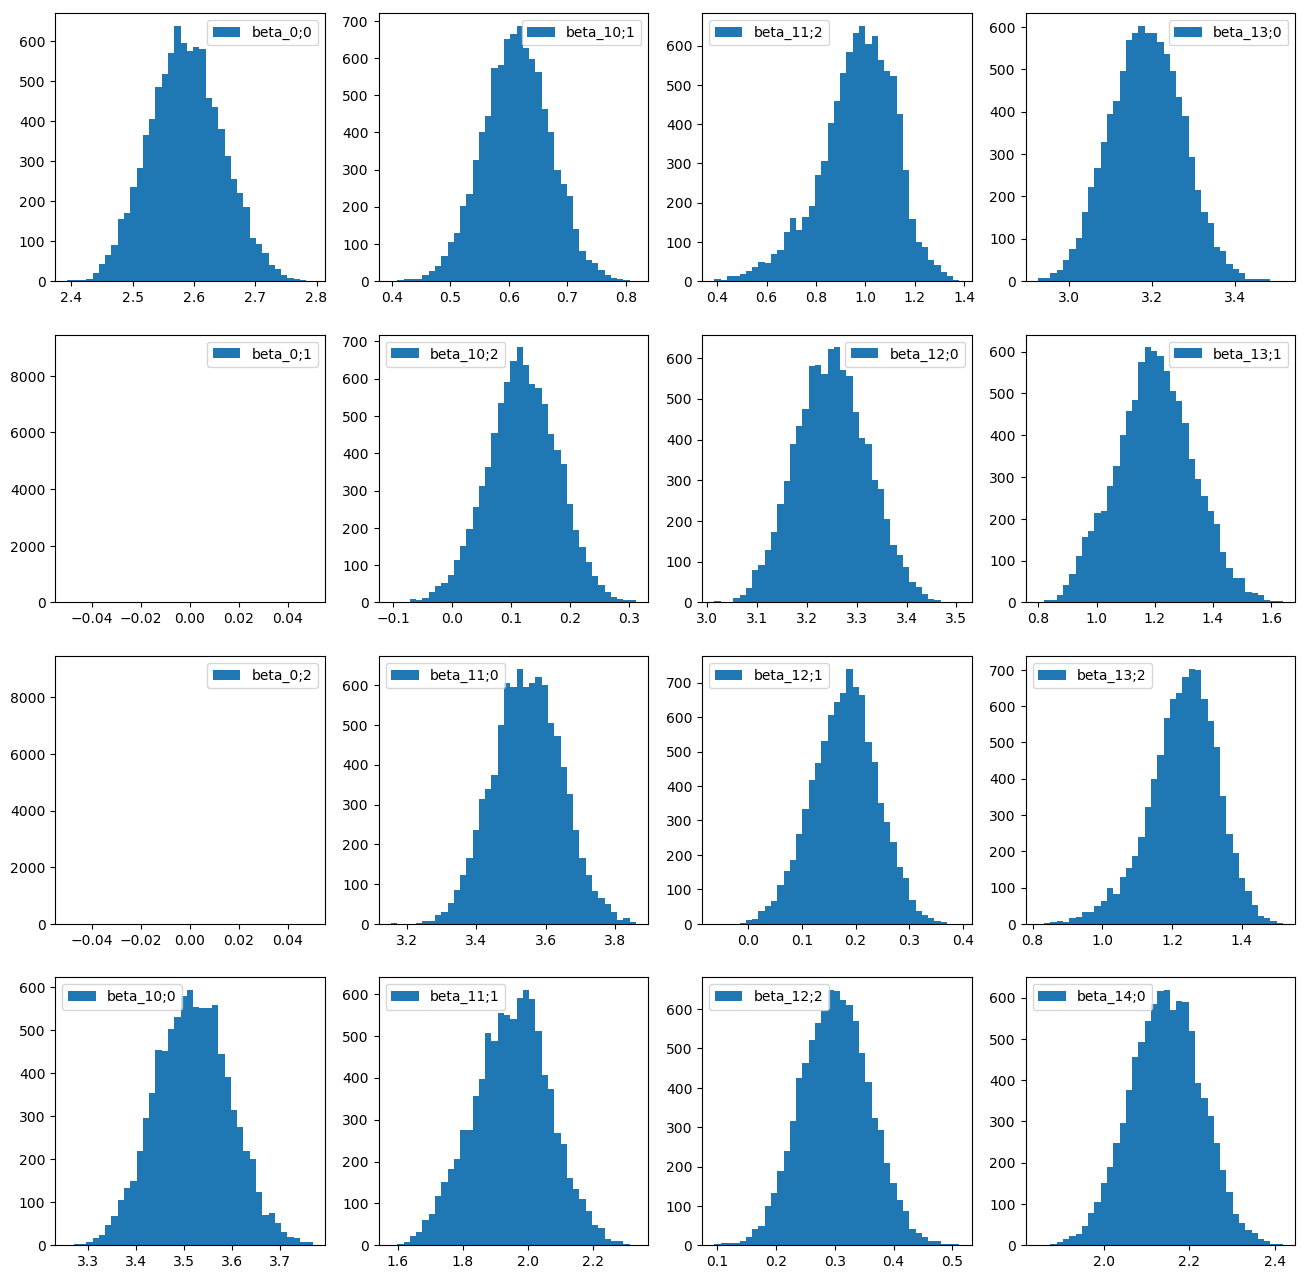

In [11]:
dp = DistributionPlotter(beta_trace, 0)
f = dp.plot_4x4_hists(skip_obs=1000)
f.savefig('figs_probit//probit_beta_dist_plot.png')
f

### Y*

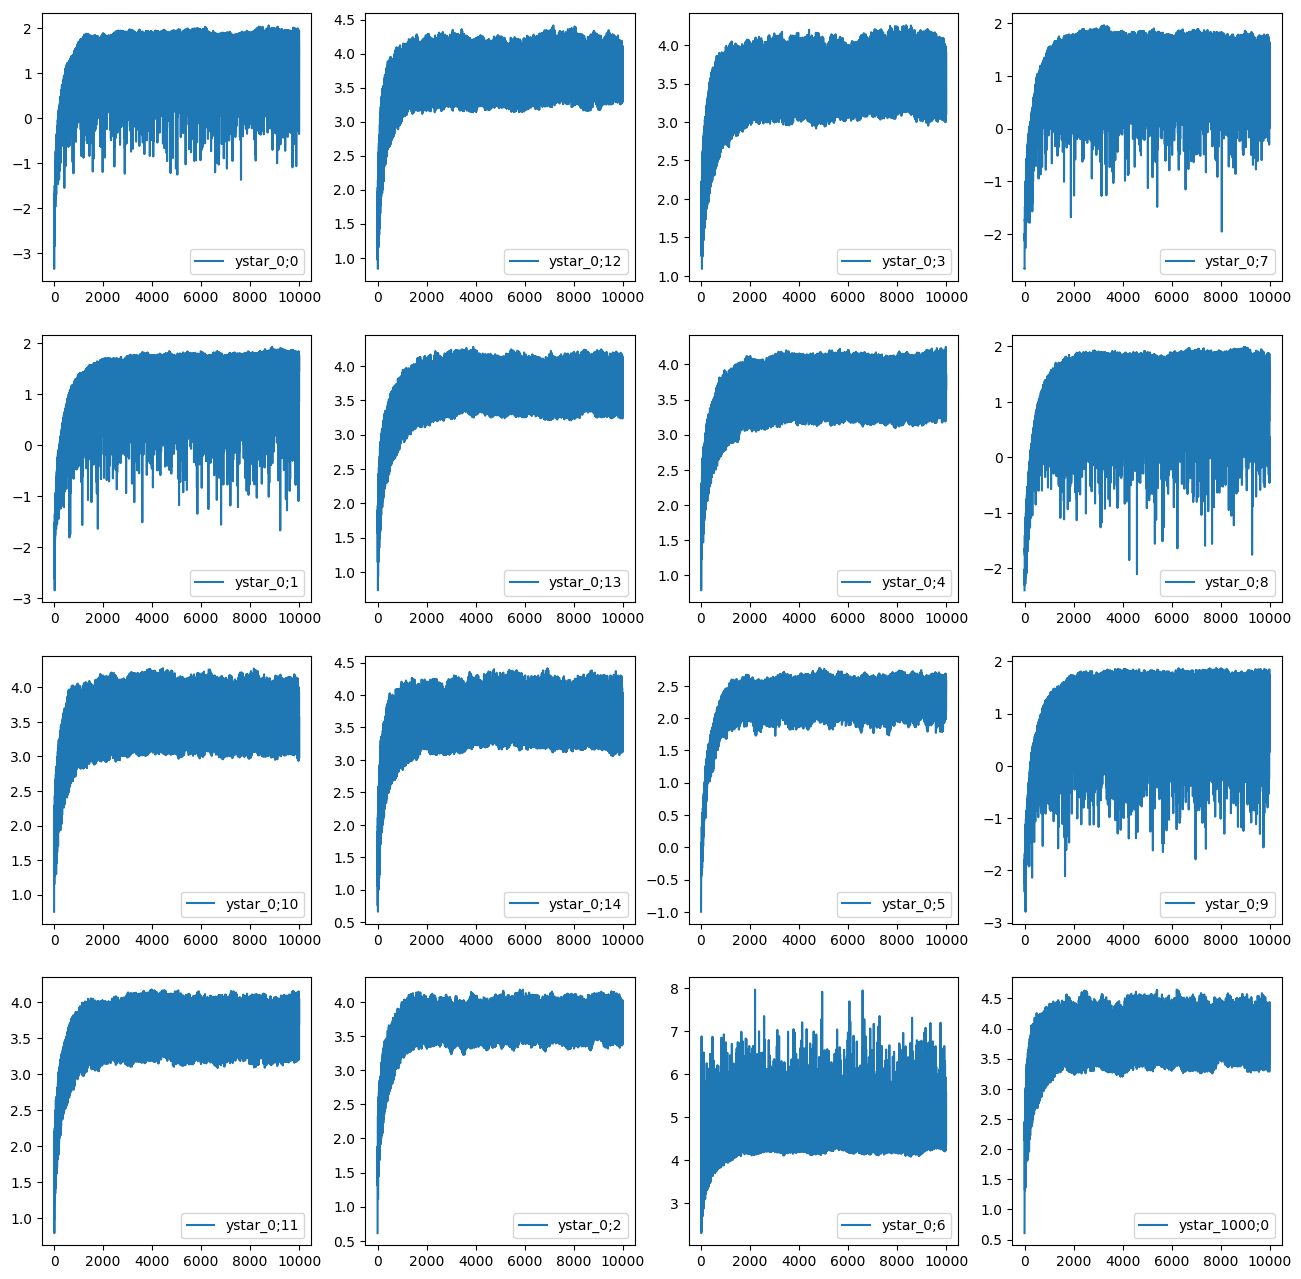

In [12]:
tp = TracePlotter(ystar_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_ystar_trace_plot.png')
f

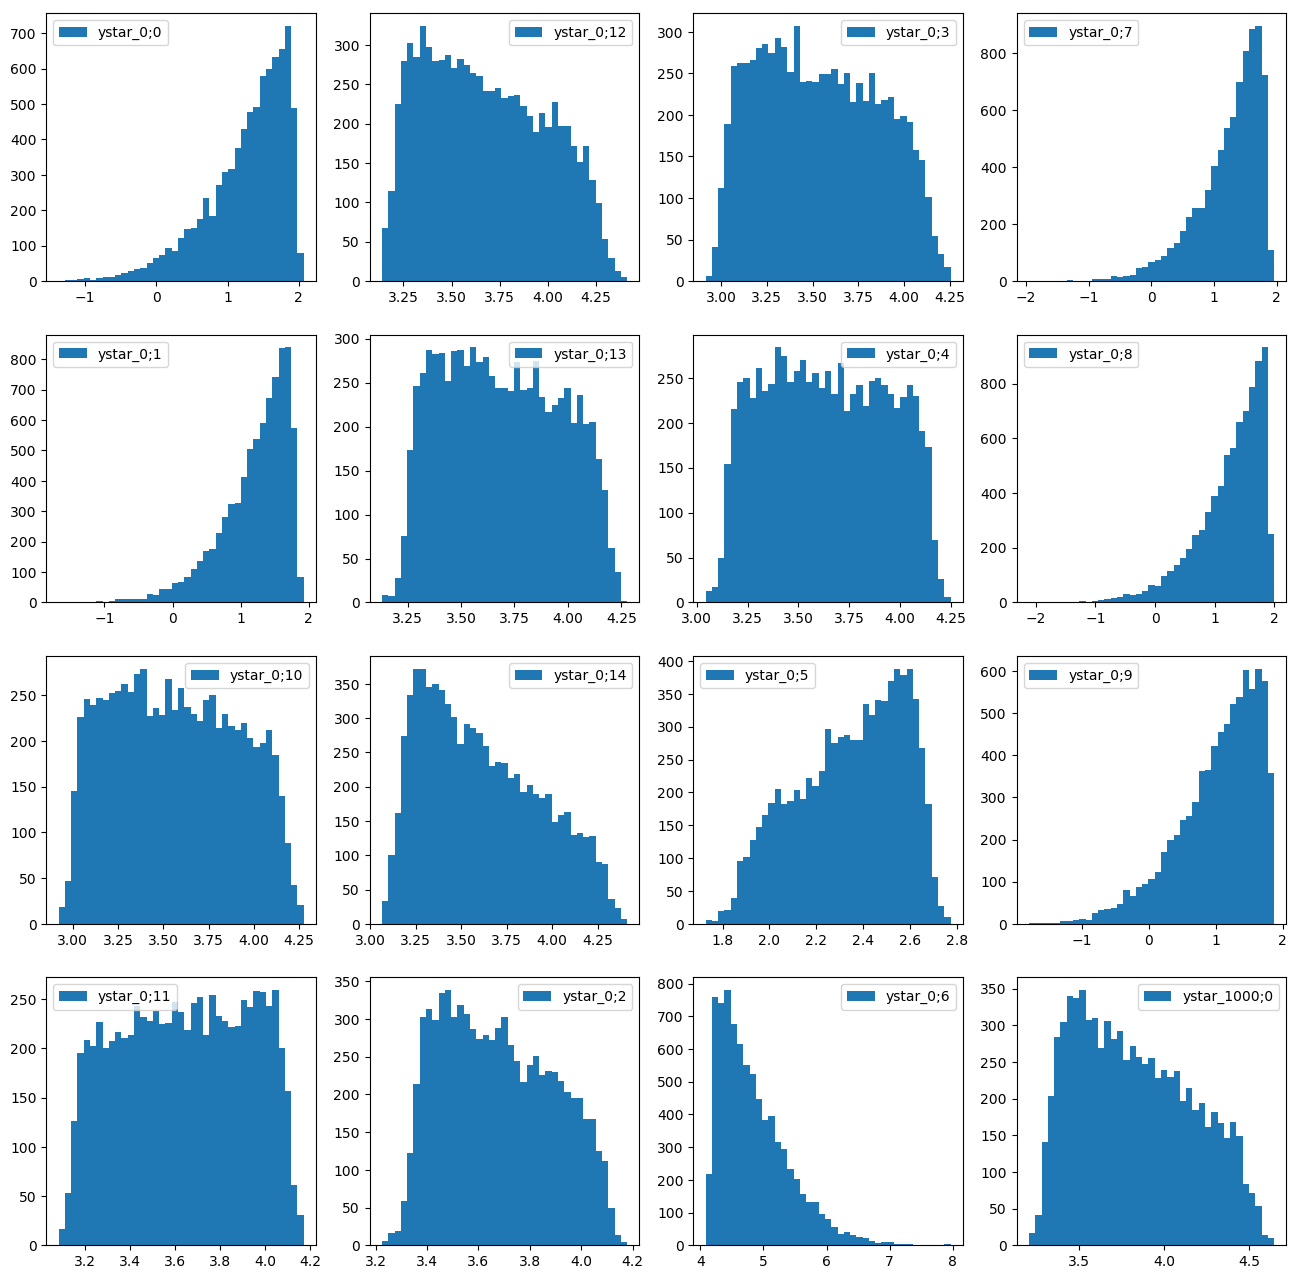

In [13]:
dp = DistributionPlotter(ystar_trace, 0)
f = dp.plot_4x4_hists(2000)
f.savefig('figs_probit//probit_ystar_dist_plot.png')
f

### factors

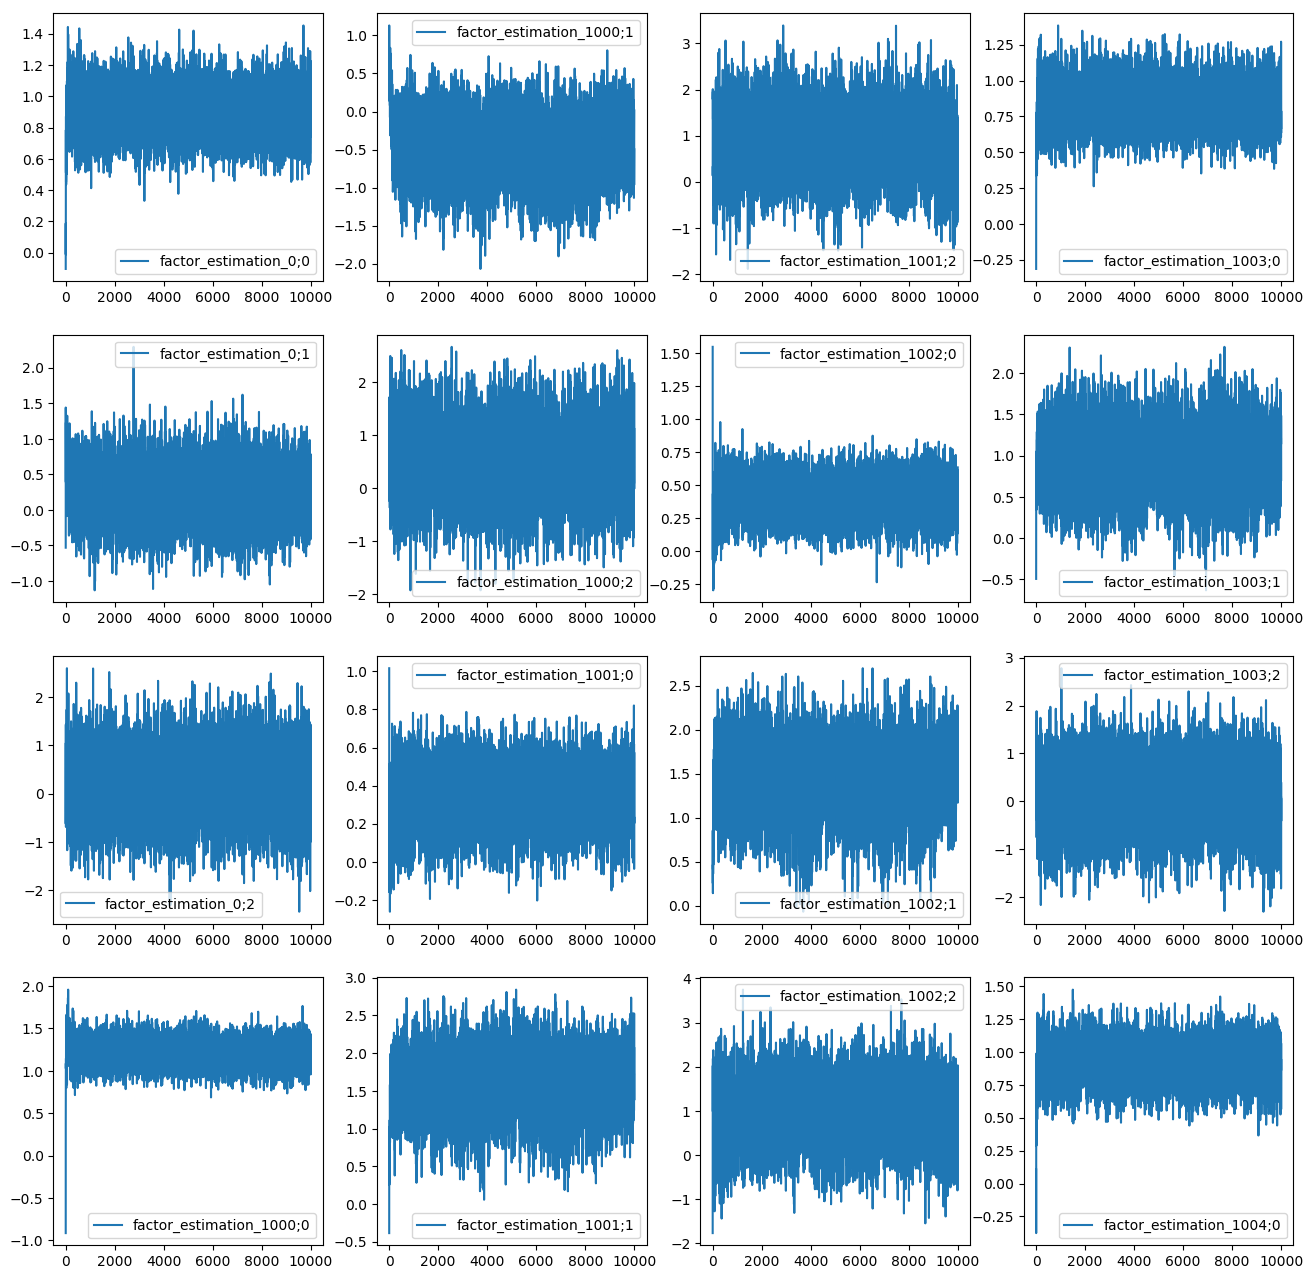

In [14]:
tp = TracePlotter(factor_trace)
f = tp.plot_4x4_traces()
f.savefig('figs_probit//probit_factor_trace_plot.png')
f

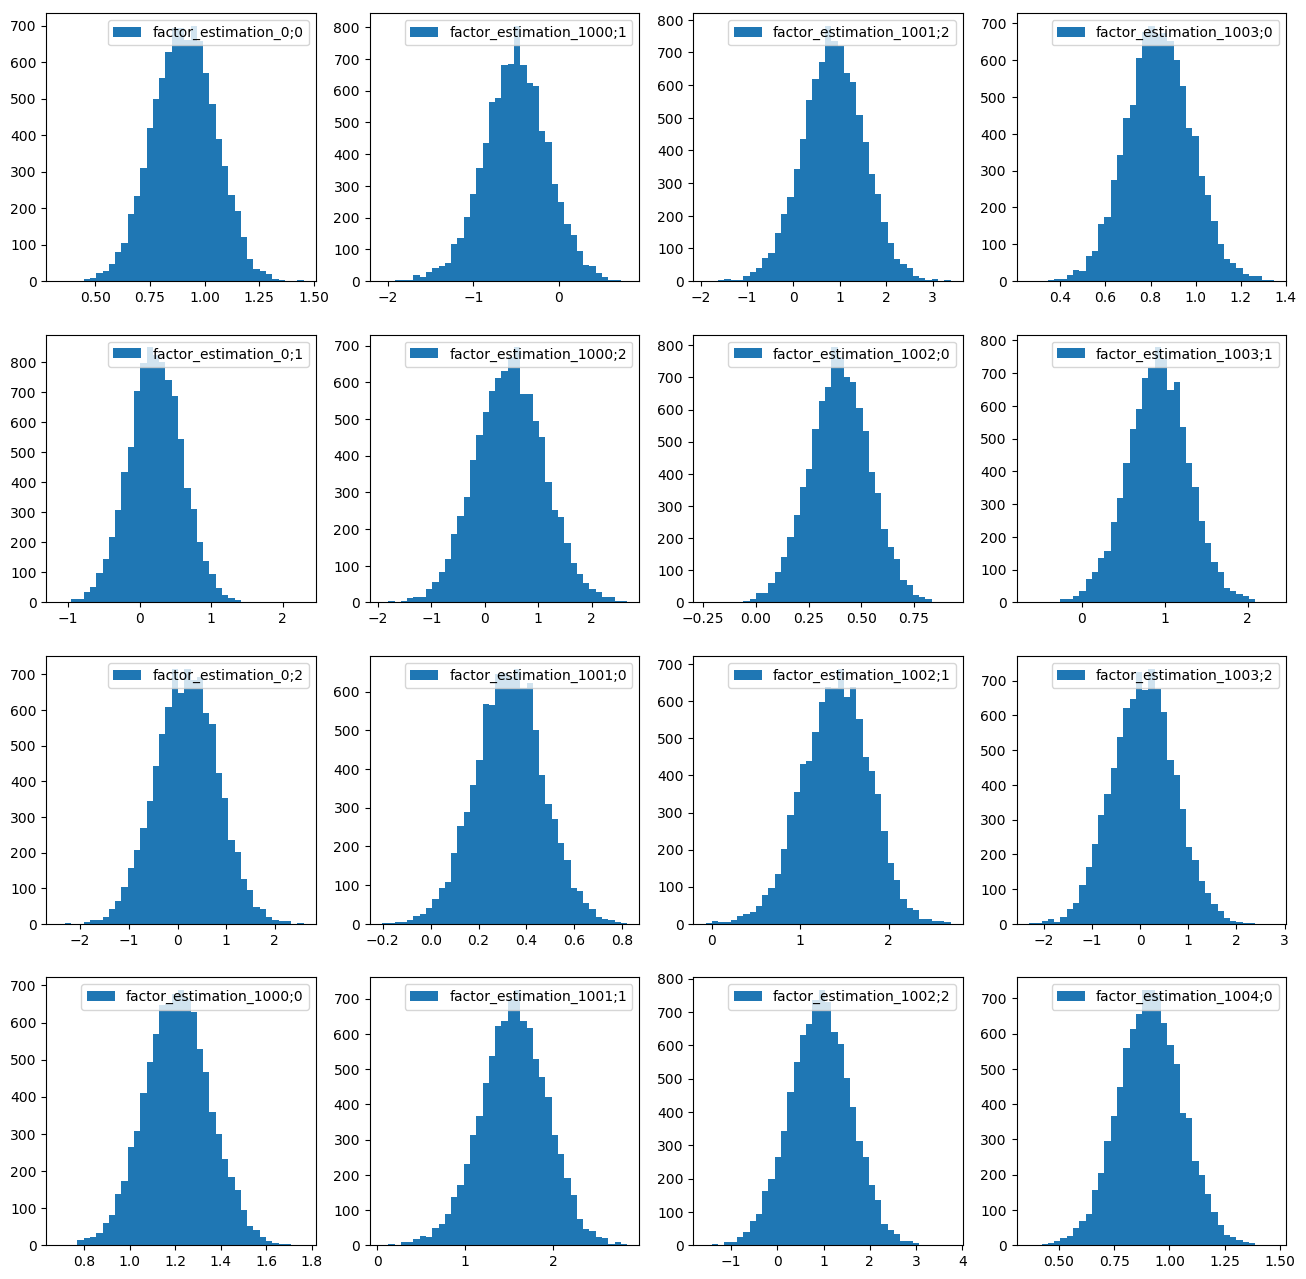

In [15]:
dp = DistributionPlotter(factor_trace, 0)
f = dp.plot_4x4_hists(skip_obs=1000)
f.savefig('figs_probit//probit_factor_dist_plot.png')
f

### Scatter plot of factors

In [16]:
F = Parameters(factor_trace)
F._calc_param_mean_dict(1000)
factors = F.params_to_df()

In [17]:
factors['party_names'] = [party_name_from_key(label) for label in labels]

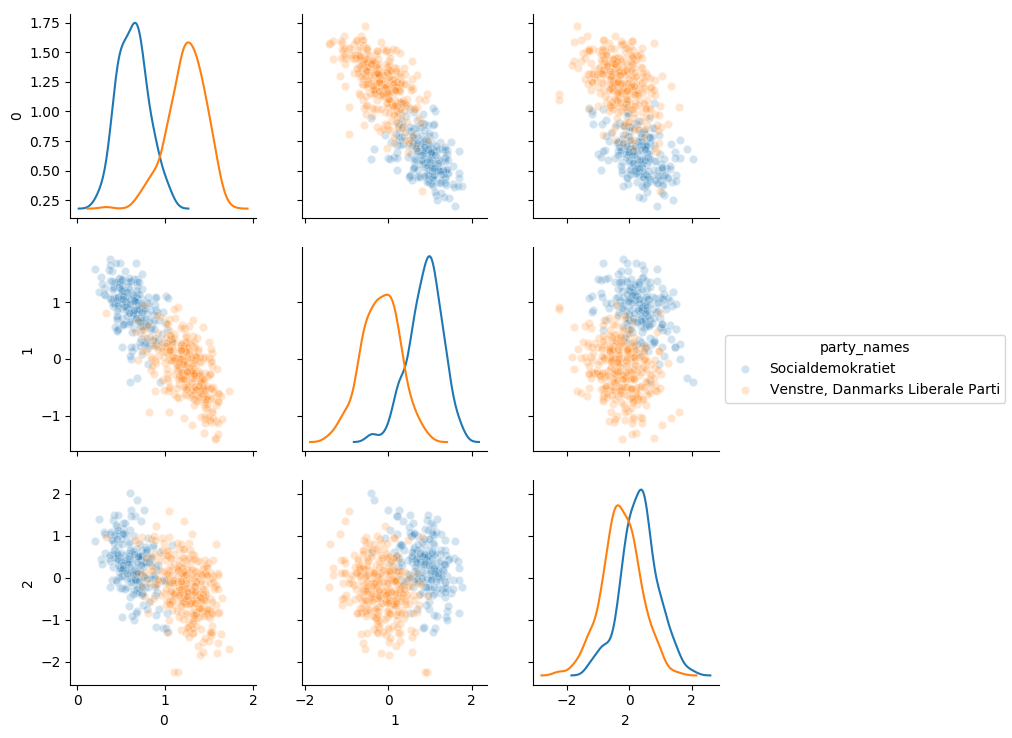

In [18]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Socialdemokratiet')]
scatter_v_s = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_s.savefig('figs_probit//probit_scatter_v_df.png')
scatter_v_s.fig

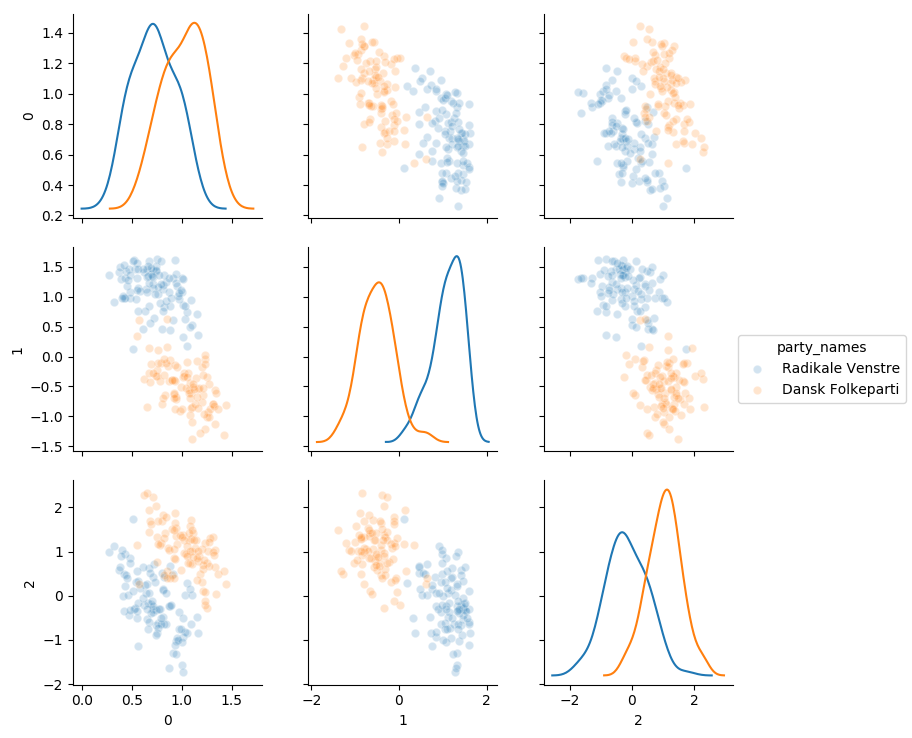

In [19]:
tmp = factors.loc[(factors['party_names'] == 'Radikale Venstre') | (factors['party_names'] == 'Dansk Folkeparti')]
scatter_rv_df = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_rv_df.savefig('figs_probit//probit_scatter_rv_df.png')
scatter_rv_df.fig

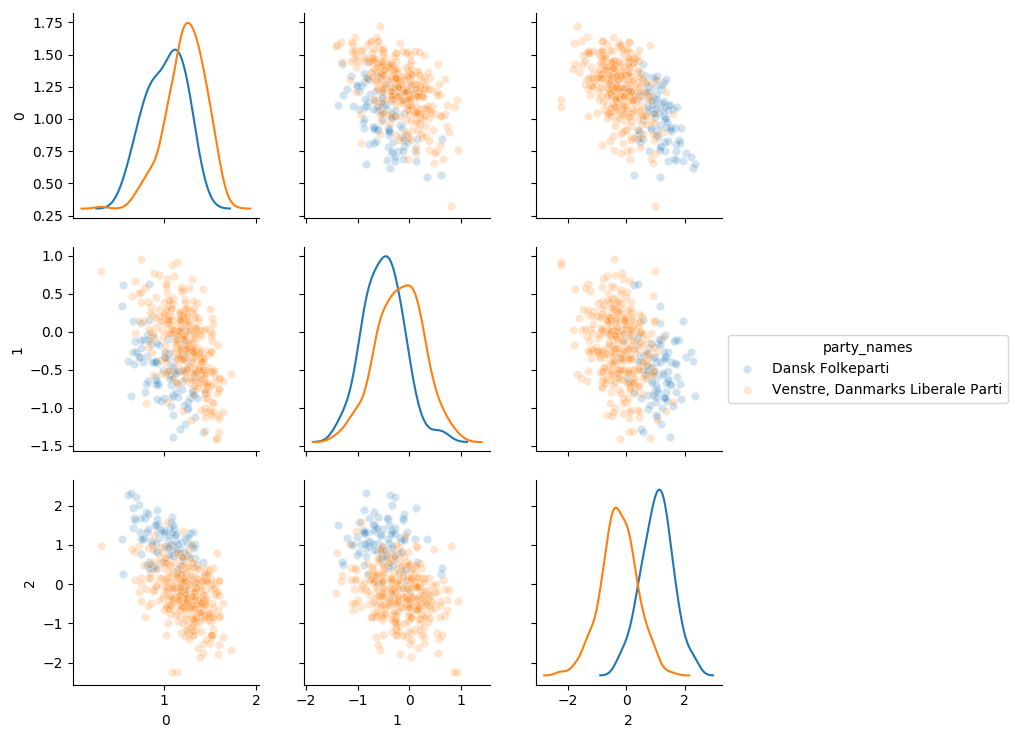

In [20]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Dansk Folkeparti')]
scatter_v_df = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_df.savefig('figs_probit//probit_scatter_v_df.png')
scatter_v_df.fig

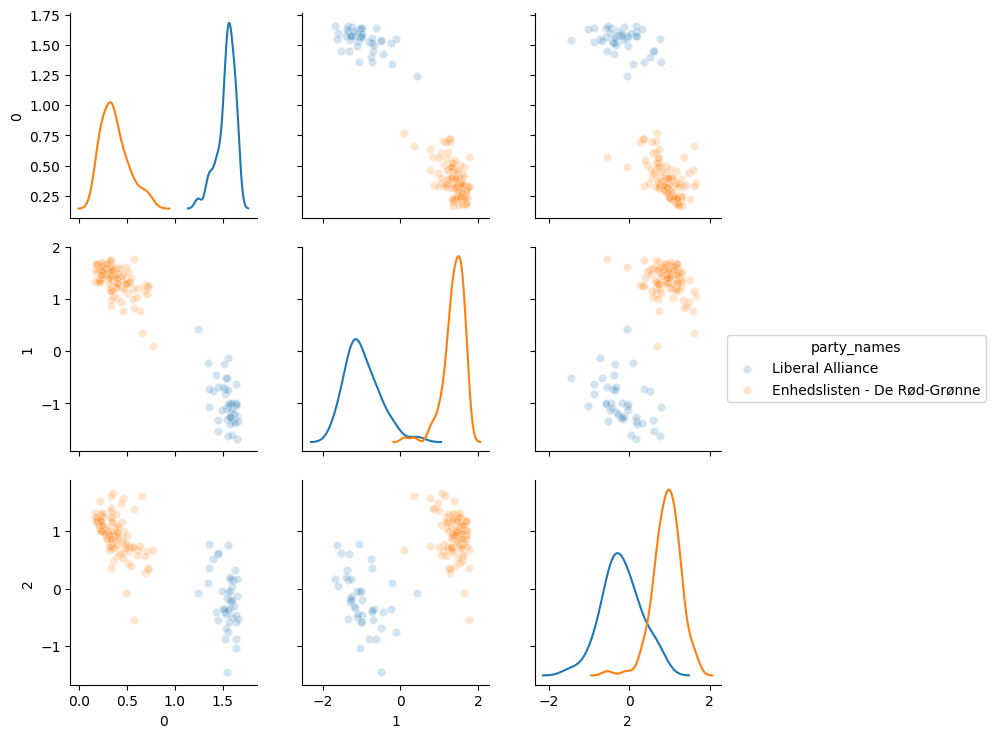

In [21]:
tmp = factors.loc[(factors['party_names'] == 'Liberal Alliance') | (factors['party_names'] == 'Enhedslisten - De Rød-Grønne')]
scatter_la_el = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_la_el.savefig('figs_probit//probit_scatter_la_el.png')
scatter_la_el.fig

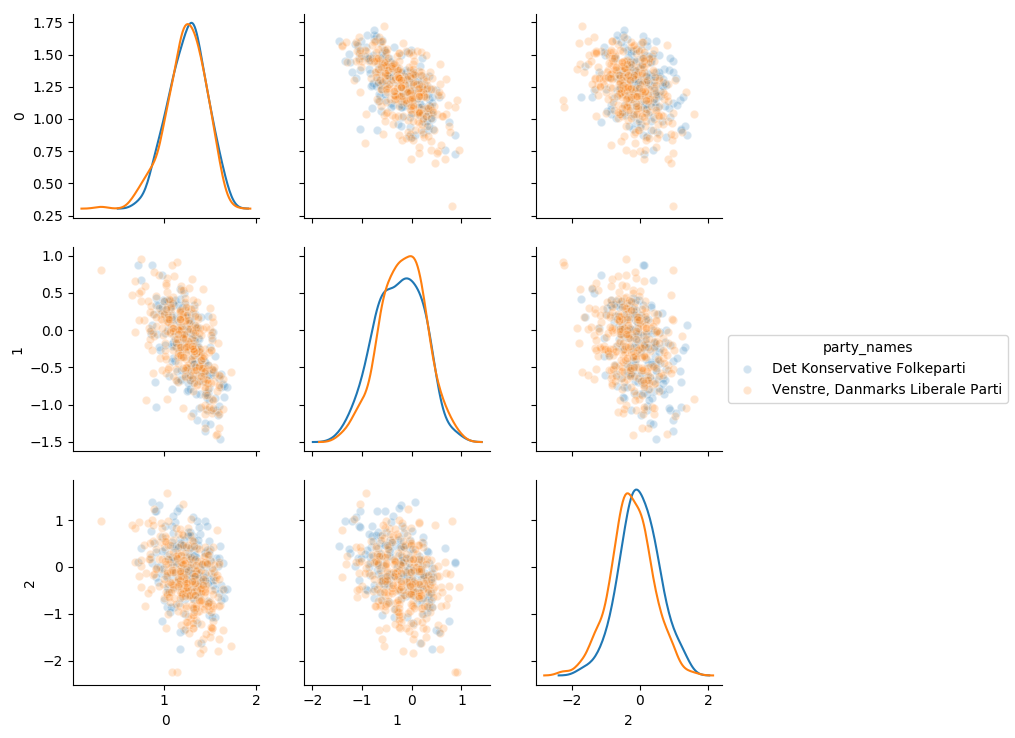

In [22]:
tmp = factors.loc[(factors['party_names'] == 'Venstre, Danmarks Liberale Parti') | (factors['party_names'] == 'Det Konservative Folkeparti')]
scatter_v_c = sbn.pairplot(tmp, hue='party_names', diag_kind='kde', plot_kws={'alpha': 0.2})
scatter_v_c.savefig('figs_probit//probit_scatter_v_c.png')
scatter_v_c.fig

In [23]:
param = Parameters(beta_trace)
param._calc_param_mean_dict(1000)
loadings = param.params_to_df()
loadings['question'] = order

In [24]:
latex_loadings = loadings.round(2)
latex_loadings.set_index('question', inplace=True)
print(latex_loadings.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     0 &     1 &     2 \\
question &       &       &       \\
\midrule
q2       &  2.59 &  0.00 &  0.00 \\
q8       &  2.67 &  0.65 &  0.00 \\
q0       &  2.90 & -0.06 &  0.16 \\
q1       &  3.39 &  0.31 &  0.22 \\
q3       &  3.30 &  1.85 &  0.81 \\
q4       &  3.34 &  1.86 &  1.24 \\
q5       &  3.51 &  1.85 &  0.90 \\
q6       &  2.29 &  2.00 &  0.54 \\
q7       &  2.59 & -0.02 &  0.73 \\
q9       &  1.99 &  0.08 &  0.37 \\
q10      &  3.52 &  0.61 &  0.12 \\
q11      &  3.55 &  1.95 &  0.97 \\
q12      &  3.25 &  0.18 &  0.30 \\
q13      &  3.19 &  1.20 &  1.23 \\
q14      &  2.15 &  1.96 &  1.02 \\
\bottomrule
\end{tabular}

